In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, BatchNormalization, Dropout,
    TimeDistributed, Flatten, Normalization, Rescaling
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

In [50]:
path = '/content/drive/MyDrive/Project Dataset/MTP Dataset/'
df_train = pd.read_csv(path+'train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv(path+'test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_test = pd.read_csv(path+'RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
y_test.shape

(100, 1)

In [51]:
train = df_train.copy()
test = df_test.copy()
print('Shape of the train dataset : ',train.shape)
print('Shape of the test dataset : ',test.shape)

Shape of the train dataset :  (20631, 26)
Shape of the test dataset :  (13096, 26)


In [52]:
display(train)
display(test)

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [53]:
def process_targets(data_length, early_rul):
  early_rul_duration = data_length - early_rul
  if early_rul_duration <= 0:
    return np.arange(data_length-1, -1, -1)
  else:
    new_early_rul = early_rul * np.ones(early_rul_duration)
    origin_rul = np.arange(early_rul-1, -1, -1)
    return np.append(new_early_rul,origin_rul)

In [54]:
def process_input_data_with_targets(input_data, target_data, window_length, shift):
    # Number of batches
    num_batches = int(np.floor((len(input_data) - window_length) / shift)) + 1
    num_features = input_data.shape[1]  # Number of features per sample

    # Prepare output array
    output = np.repeat(np.nan, repeats=num_batches * window_length * num_features)
    output_data = output.reshape(num_batches, window_length, num_features)

    if target_data is None:  # Test data without target
        for batch in range(num_batches):
            start_idx = shift * batch
            end_idx = start_idx + window_length
            output_data[batch, :, :] = input_data[start_idx:end_idx, :]
        return output_data
    else:  # Training data with targets
        output_targets = np.repeat(np.nan, repeats=num_batches)  # target RUL
        for batch in range(num_batches):
            window_start = shift * batch
            window_end = window_start + window_length

            output_data[batch, :, :] = input_data[window_start:window_end, :]
            output_targets[batch] = target_data[window_end - 1]
        return output_data, output_targets


In [55]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows=1):
    # Number of possible test batches
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length) / shift)) + 1

    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(
            test_data_for_an_engine[-required_len:, :],
            target_data=None,
            window_length=window_length,
            shift=shift
        )
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(
            test_data_for_an_engine[-required_len:, :],
            target_data=None,
            window_length=window_length,
            shift=shift
        )
        return batched_test_data_for_an_engine, num_test_windows


In [56]:
drop_labels = ['sensor_1', 'sensor_5','sensor_6','sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']
train_data_first_column = train["unit_number"]
test_data_first_column = test["unit_number"]

scaler = MinMaxScaler()

train_data = scaler.fit_transform(train.drop(columns = ['unit_number'] + setting_names + drop_labels ))
test_data = scaler.transform(test.drop(columns = ['unit_number'] + setting_names+ drop_labels ))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

In [57]:
window_length = 30
shift = 1
early_rul = 125
num_test_windows = 5

In [58]:
processed_train_data = []
processed_train_targets = []

# Use Python int instead of np.int
for i in np.arange(1, num_train_machines + 1, dtype=int):
    # Get data for one machine
    temp_train_data = train_data[train_data[0] == i].drop(columns=[0]).values

    # Generate targets
    temp_train_targets = process_targets(data_length=temp_train_data.shape[0], early_rul=early_rul)

    # Process input data with targets
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(
        temp_train_data, temp_train_targets, window_length=window_length, shift=shift
    )

    # Append to lists
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

# Concatenate all machines' data
processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)


In [59]:
processed_test_data = []
num_test_windows_list = []

for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values

    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift = shift,num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = y_test.values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

In [60]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (17731, 30, 15)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 15)
True RUL shape:  (100, 1)


In [61]:

processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                        processed_train_targets,
                                                        test_size = 0.2,
                                                        random_state = 666)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (14184, 30, 15)
Processed validation data shape:  (3547, 30, 15)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


In [62]:
from tensorflow.keras import layers, Model, Input
import tensorflow as tf

def Autoencoder_BiLSTM_model(window_length=30, num_features=15, latent_dim=64):
    """
    Autoencoder + Bi-LSTM model
    Args:
        window_length : number of time steps per sequence
        num_features  : number of sensor features per time step
        latent_dim    : size of latent vector from encoder
    Returns:
        Compiled Keras Model
    """

    # --------------------
    # Encoder (Autoencoder part)
    # --------------------
    inputs = Input(shape=(window_length, num_features))

    # Encoder
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Flatten to get latent vector
    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, activation='relu', name='latent_vector')(x)

    # --------------------
    # Repeat vector for LSTM
    # --------------------
    x = layers.RepeatVector(window_length)(latent)

    # --------------------
    # Bi-LSTM for sequence modeling
    # --------------------
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Bidirectional(layers.LSTM(32, activation='tanh'))(x)

    # Fully connected layers for final regression
    x = layers.Dense(96, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, name='rul_output')(x)

    model = Model(inputs=inputs, outputs=outputs, name='Autoencoder_BiLSTM')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

    return model

# Example usage
auto_bilstm_model = Autoencoder_BiLSTM_model()
auto_bilstm_model.summary()


Model: "Autoencoder_BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30, 15)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 30, 64)         │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 30, 256)        │       197,632 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 30, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rul_output (Dense)              │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,041 (1.93 MB)

 Trainable params: 507,041 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.0001

In [72]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 0)
batch_size = 50
epoch = 40
kernel_size = 3
pool_size = 2

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)

In [65]:
# Initialize the Bi-LSTM model
ae_bi_lstm_model = Autoencoder_BiLSTM_model()

# Keep it in a models dictionary for consistency
models = {"AE+Bi-LSTM": ae_bi_lstm_model}


In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_true, y_pred, model_name="Model"):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # PHM score
    d = y_pred - y_true
    phm_score = np.sum(np.where(d < 0, np.exp(-d/13) - 1, np.exp(d/10) - 1))

    print(f"=== {model_name} Evaluation ===")
    print(f"MSE        : {mse:.4f}")
    print(f"RMSE       : {rmse:.4f}")
    print(f"MAE        : {mae:.4f}")
    print(f"R²         : {r2:.4f}")
    print(f"PHM Score  : {phm_score:.4f}")

In [73]:
history_train_loss = []
history_val_loss = []

print("================ AE+Bi-LSTM =================")
start_time = time.time()

# Train the model
model_history = ae_bi_lstm_model.fit(
    processed_train_data,
    processed_train_targets,
    epochs=epoch,
    validation_data=(processed_val_data, processed_val_targets),
    callbacks=[tf_callback, callback],
    batch_size=batch_size,
    verbose=1
)

# Predict on test data
rul_pred = ae_bi_lstm_model.predict(processed_test_data, verbose=0).reshape(-1)

# Aggregate predictions per engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1/num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Print losses
print('Training loss  :', model_history.history['loss'][-1])
print('Validation loss:', model_history.history['val_loss'][-1])

# Evaluate predictions
y_true = y_test.values.flatten()
evaluate(y_true, mean_pred_for_each_engine, model_name="AE + Bi-LSTM") # ensure your evaluate() supports R², MAE, RMSE, MSE

# Save loss history
history_train_loss.append(model_history.history['loss'])
history_val_loss.append(model_history.history['val_loss'])

end_time = time.time()
print('Run Time:', int(end_time - start_time), 'sec')


================ AE+Bi-LSTM =================
Epoch 1/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 146.1315 - val_loss: 126.1711 - learning_rate: 0.0010
Epoch 2/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 110.7730 - val_loss: 138.5226 - learning_rate: 0.0010
Epoch 3/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 109.6409 - val_loss: 121.0800 - learning_rate: 0.0010
Epoch 4/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 102.8384 - val_loss: 107.8956 - learning_rate: 0.0010
Epoch 5/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 96.1069 - val_loss: 103.1378 - learning_rate: 0.0010
Epoch 6/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 89.3420 - val_loss: 101.1065 - learning_rate: 0.0010
Epoch 7/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 91.2126 - val_loss: 109.4391 - learning_rate: 0.0010
Epoch 8/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 87.6295 - val_loss: 100.6500 - learning_rate: 0.0010
Epoch 9/40
284/284 ━━━━━━━━━━━━━━━━━━

In [68]:
print("Training sequences:", processed_train_data.shape)
print("Validation sequences:", processed_val_data.shape)
print("Test sequences:", processed_test_data.shape)
print("True RULs:", true_rul.shape)

Training sequences: (14184, 30, 15)
Validation sequences: (3547, 30, 15)
Test sequences: (497, 30, 15)
True RULs: (100, 1)


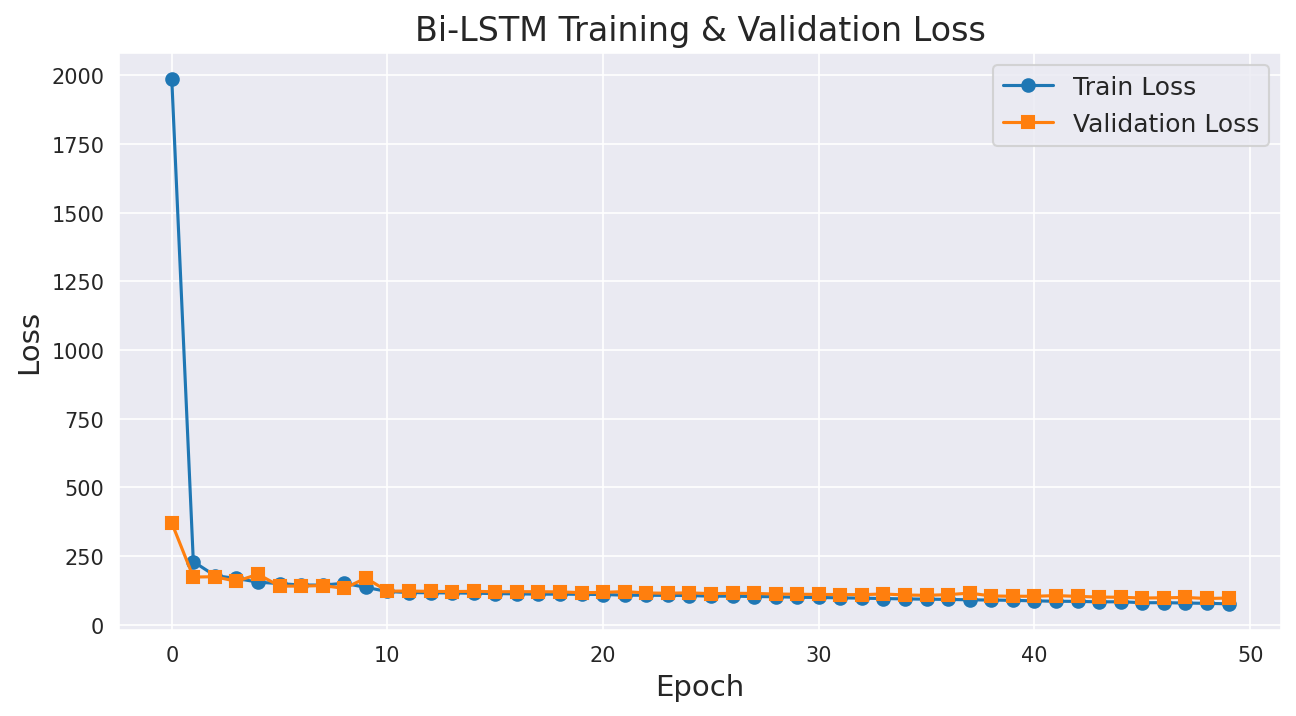

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')  # options: 'whitegrid', 'darkgrid', 'ticks', etc.

# Plot Bi-LSTM training & validation loss
plt.figure(figsize=(10, 5), dpi=150)

plt.plot(history_train_loss[0], label='Train Loss', marker='o')
plt.plot(history_val_loss[0], label='Validation Loss', marker='s')

plt.title('Bi-LSTM Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## Plot real data and the predicted one to make some comparison

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_predActual(y_test, y_predictions, model_name):
    y_test = np.array(y_test).flatten()
    y_predictions = np.array(y_predictions).flatten()

    plt.style.use('seaborn-white')
    plt.figure(figsize=(20, 5))
    plt.title(f'{model_name} Prediction Results', fontsize=16)
    plt.xlabel('Test Engine', fontsize=16)
    plt.ylabel('RUL', fontsize=16)

    sns.lineplot(x=np.arange(len(y_test)), y=y_test, color='lightseagreen', label='Actual')
    sns.lineplot(x=np.arange(len(y_predictions)), y=y_predictions, color='salmon', label='Predicted')

    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


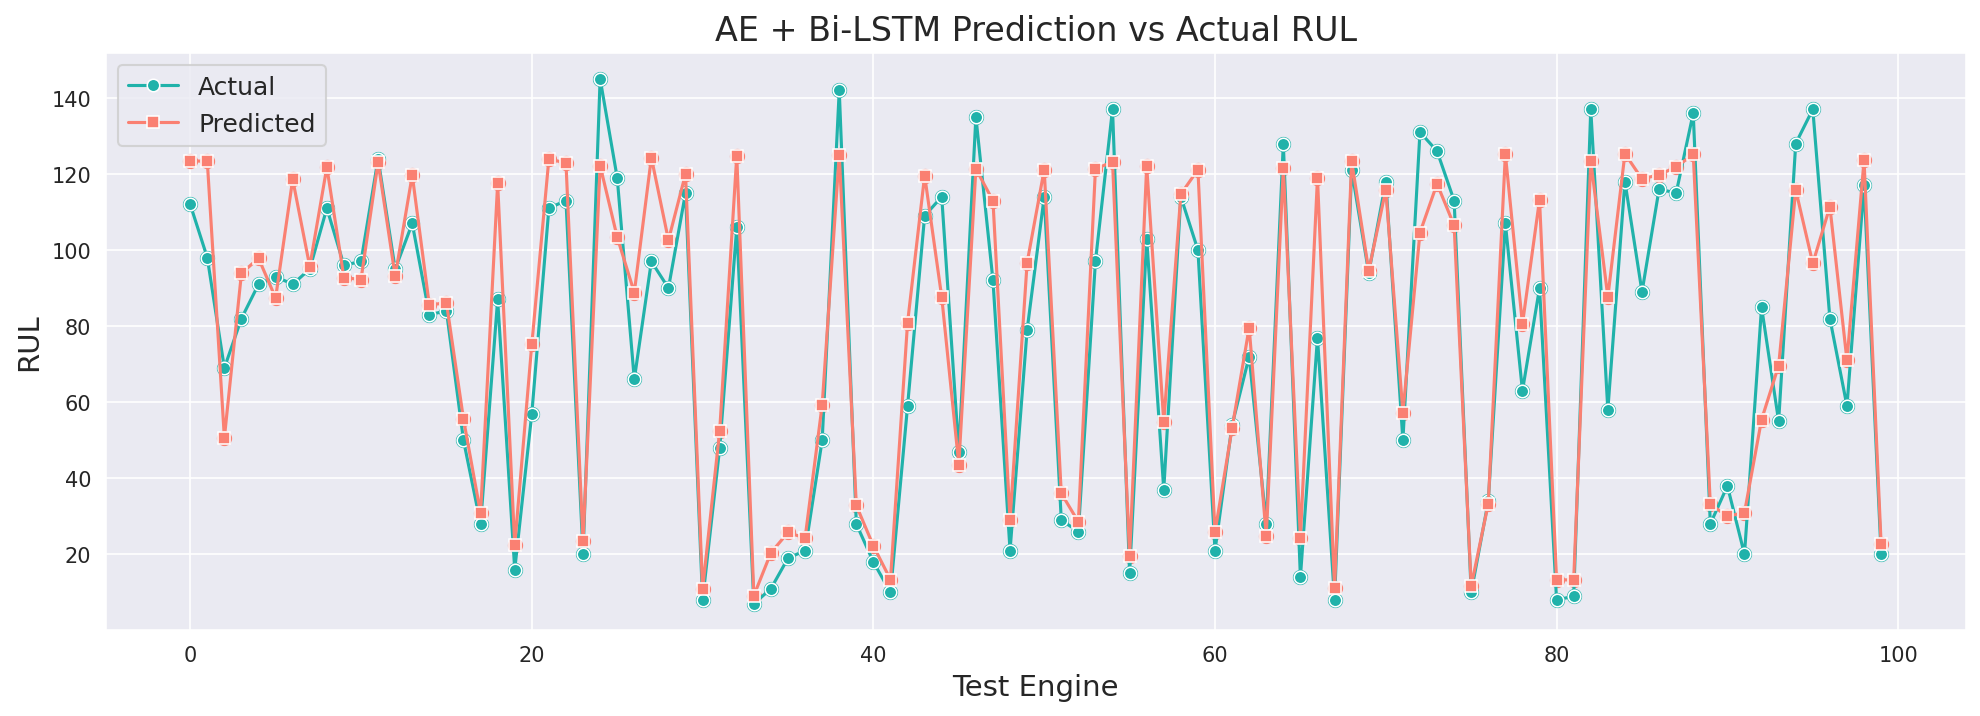

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_predActual(y_true, y_pred, model_name="Model"):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    sns.set_style('darkgrid')  # Seaborn style

    plt.figure(figsize=(16, 5), dpi=150)
    plt.title(f'{model_name} Prediction vs Actual RUL', fontsize=16)
    plt.xlabel('Test Engine', fontsize=14)
    plt.ylabel('RUL', fontsize=14)

    # Plot actual and predicted RUL with markers
    sns.lineplot(x=np.arange(len(y_true)), y=y_true, color='lightseagreen', label='Actual', marker='o')
    sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, color='salmon', label='Predicted', marker='s')

    # Optional: mark each engine explicitly
    for i in range(len(y_true)):
        plt.scatter(i, y_true[i], color='lightseagreen', s=40)  # actual
        plt.scatter(i, y_pred[i], color='salmon', s=40)         # predicted

    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Define y_true from test RULs
y_true = true_rul.flatten()

# Plot using your predicted RULs
plot_predActual(y_true, mean_pred_for_each_engine, "AE + Bi-LSTM")
